# Игра в имитацию
КБ-211 Ставер Леонид

Задание:
1. Дискретная случайная величина ξ принимает значения 0, 1, 2 и 3 с вероятностями соответствующими данным варианта. Используя генератор псевдослучайных чисел, получить 10000 чисел, имитирующих поведение ξ. Вывести значения частот появления значений 0, 1, 2 и 3. Проверить на уровне значимости 0,05 соответствие полученных данных распределению ξ, используя критерий сравнения долей. Вероятности: р0=i/2(i+j+k), р1=(j+k)/2(i+j+k), р2=(i+k)/2(i+j+k), р3=j/2(i+j+k). Значения i, j, k являются последними тремя цифрами зачетки. Если какая-то из этих трех цифр равна 0, то вместо 0 берется 10.
2. Непрерывная случайная величина ξ распределена по экспоненциальному закону с параметром λ соответствующим данным варианта. Построив генератор псевдослучайных чисел, получить 10000 чисел, имитирующих поведение ξ. Разбить выборку на интервалы и построить гистограмму частот. Вывести средние арифметическое значений выборки и проверить на уровне значимости 0,05 соответствие полученных данных показательному распределению с параметром λ. Здесь λ определяется номер по списку разделить на 4.

## Задание №1

In [3]:

# Задание №1
import numpy as np
from scipy.stats import norm

np.random.seed(255)


def preview(text: str):
    print("-"*50)
    print(text.center(50))
    print("-"*50)


def inverse_transform_sampling(n_samples: int, probabilities: list, values: list):

    #! Вычисляем кумулятивные вероятности (границы отрезков)
    cumulative_probs = np.cumsum(probabilities)

    uniform_sample = np.random.uniform(0, 1, n_samples)

    #! Преобразуем в дискретные значения xi
    discrete_sample = np.zeros(n_samples, dtype=int)

    for i in range(n_samples):
        yi = uniform_sample[i]
        for j, cum_prob in enumerate(cumulative_probs):
            if yi <= cum_prob:
                discrete_sample[i] = values[j]
                break

    return discrete_sample, uniform_sample


if __name__ == "__main__":

    # ? 105215353

    i = 3  # * первая цифра
    j = 5  # * вторая цифра
    k = 3  # * третья цифра

    student_number = 17

    denominator = 2 * (i + j + k)
    p0 = i / denominator
    p1 = (j + k) / denominator
    p2 = (i + k) / denominator
    p3 = j / denominator

    n_samples = 10000
    probabilities = [p0, p1, p2, p3]
    values = [0, 1, 2, 3]

    preview(text="Задача 1")

    sample, uniform_values = inverse_transform_sampling(
        n_samples, probabilities, values)

    # * Подсчет количества вхождений
    frequencies = np.bincount(sample, minlength=4)
    relative_frequencies = frequencies / n_samples

    print(f"Результаты моделирования (n={n_samples}):")
    for i, (freq, rel_freq) in enumerate(zip(frequencies, relative_frequencies)):
        print(f"\tЗначение {i}: {freq} раз ({rel_freq:.3f})")

    print("\nПроверка гипотезы (критерий сравнения долей):")

    for val, freq, p_theor in zip(values, frequencies, probabilities):
        p_obs = freq / n_samples
        se = np.sqrt(p_theor * (1 - p_theor) / n_samples)  # стандартная ошибка
        z_stat = (p_obs - p_theor) / se
        p_val = 2 * (1 - norm.cdf(abs(z_stat)))

        conclusion = "Гипотеза НЕ отвергается" if p_val > 0.05 else "Гипотеза отвергается"

        print(
            f"""Значение {val}:
\tВыборочная доля p*={p_obs:.3f},
\tТеоретическая доля p0={p_theor:.3f}
\tСтатистика={z_stat:.2f}
\tСтандартная ошибка={se:.4f}
    Вывод: {conclusion}
"""
        )

--------------------------------------------------
                     Задача 1                     
--------------------------------------------------
Результаты моделирования (n=10000):
	Значение 0: 1294 раз (0.129)
	Значение 1: 3725 раз (0.372)
	Значение 2: 2745 раз (0.275)
	Значение 3: 2236 раз (0.224)

Проверка гипотезы (критерий сравнения долей):
Значение 0:
	Выборочная доля p*=0.129,
	Теоретическая доля p0=0.136
	Статистика=-2.03
	Стандартная ошибка=0.0034
    Вывод: Гипотеза отвергается

Значение 1:
	Выборочная доля p*=0.372,
	Теоретическая доля p0=0.364
	Статистика=1.84
	Стандартная ошибка=0.0048
    Вывод: Гипотеза НЕ отвергается

Значение 2:
	Выборочная доля p*=0.275,
	Теоретическая доля p0=0.273
	Статистика=0.40
	Стандартная ошибка=0.0045
    Вывод: Гипотеза НЕ отвергается

Значение 3:
	Выборочная доля p*=0.224,
	Теоретическая доля p0=0.227
	Статистика=-0.88
	Стандартная ошибка=0.0042
    Вывод: Гипотеза НЕ отвергается



## Задание №2


------------------------------------------------------------
                         Задача №2                          
------------------------------------------------------------

Параметр экспоненциального распределения λ = 4.25

Статистики выборки:
Выборочное среднее: 0.2331
Теоретическое среднее: 0.2353


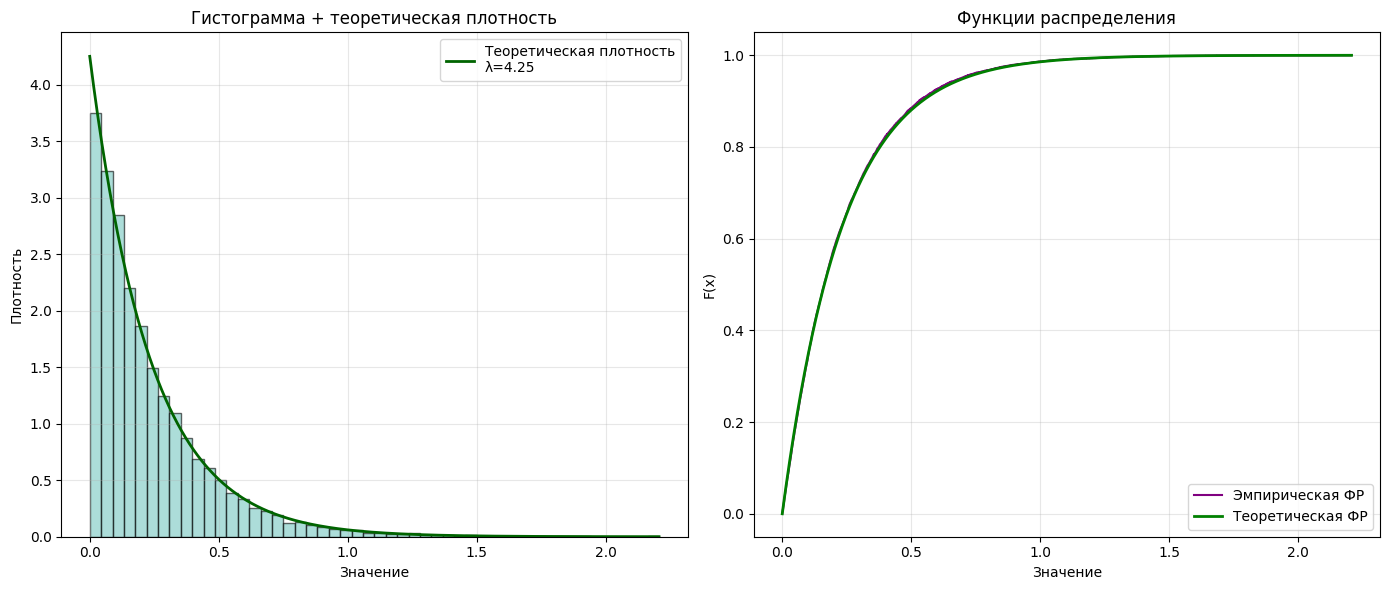

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

np.random.seed(255)


def banner(msg: str):
    print(f"\n{'-'*60}\n{msg.center(60)}\n{'-'*60}\n")


banner("Задача №2")

digits = {'i': 3, 'j': 5, 'k': 3}
student_id = 17

total = 2 * sum(digits.values())
weights = [
    digits['i'] / total,
    (digits['j'] + digits['k']) / total,
    (digits['i'] + digits['k']) / total,
    digits['j'] / total
]
outcomes = [0, 1, 2, 3]

rate = student_id / 4
print(f"Параметр экспоненциального распределения λ = {rate}")

N = 10000
U = np.random.rand(N)
exp_data = -np.log(1 - U) / rate

mean_empirical = exp_data.mean()
mean_theoretical = 1 / rate

print(f"\nСтатистики выборки:")
print(f"Выборочное среднее: {mean_empirical:.4f}")
print(f"Теоретическое среднее: {mean_theoretical:.4f}")

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].hist(exp_data, bins=50, density=True,
             alpha=0.6, color='#76c7c0', edgecolor='k')
x_vals = np.linspace(0, exp_data.max(), 1000)
axes[0].plot(x_vals, rate * np.exp(-rate * x_vals), 'darkgreen', lw=2,
             label=f'Теоретическая плотность\nλ={rate}')
axes[0].set(title='Гистограмма + теоретическая плотность',
            xlabel='Значение', ylabel='Плотность')
axes[0].legend()
axes[0].grid(alpha=0.3)

sorted_data = np.sort(exp_data)
emp_cdf = np.arange(1, N + 1) / N
theo_cdf = expon.cdf(sorted_data, scale=1/rate)

axes[1].step(sorted_data, emp_cdf, where='post',
             color='purple', label='Эмпирическая ФР')
axes[1].plot(sorted_data, theo_cdf, 'g-', lw=2, label='Теоретическая ФР')
axes[1].set(title='Функции распределения', xlabel='Значение', ylabel='F(x)')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig("histogram.png", dpi=300)



### Критерий Колмогорова-Смирнова

In [5]:
import numpy as np
from scipy.stats import expon, chi2

# --- Настройки ---
num_bins = 20          # начальное количество интервалов
min_count = 5          # минимальное число наблюдений в интервале
alpha = 0.05           # уровень значимости
sample_size = 10000    # размер выборки
rate_param = 17 / 4    # параметр экспоненциального распределения

# --- Генерация экспоненциальной выборки ---
rng = np.random.default_rng(255)
uniform_data = rng.random(sample_size)
exp_values = -np.log(1 - uniform_data) / rate_param

# --- Разбиение на интервалы через квантили ---
quantile_edges = np.linspace(0, 1, num_bins + 1)
bin_edges = expon.ppf(quantile_edges, scale=1/rate_param)
bin_edges[-1] = np.inf  # последний интервал до бесконечности

# --- Подсчет наблюдаемых частот ---
obs_freqs = np.array([np.sum((exp_values >= bin_edges[i]) &
                             (exp_values < bin_edges[i+1])) if i < num_bins else
                      np.sum(exp_values >= bin_edges[i])
                      for i in range(num_bins)])

# --- Объединение интервалов с малыми частотами ---
edges = bin_edges.copy()
freqs = obs_freqs.copy()

while freqs.min() < min_count and len(freqs) > 2:
    idx = np.argmin(freqs)
    if idx == 0:
        freqs[1] += freqs[0]
        freqs = freqs[1:]
        edges = edges[1:]
    elif idx == len(freqs) - 1:
        freqs[-2] += freqs[-1]
        freqs = freqs[:-1]
        edges = edges[:-1]
    else:
        left, right = freqs[idx-1], freqs[idx+1]
        if left <= right:
            freqs[idx-1] += freqs[idx]
            freqs = np.delete(freqs, idx)
            edges = np.delete(edges, idx)
        else:
            freqs[idx+1] += freqs[idx]
            freqs = np.delete(freqs, idx)
            edges = np.delete(edges, idx+1)

# --- Расчет теоретических частот ---
interval_count = len(freqs)
theo_freqs = np.zeros(interval_count)
for i in range(interval_count):
    lower = edges[i]
    upper = np.inf if i == interval_count-1 else edges[i+1]
    prob = expon.cdf(upper, scale=1/rate_param) - \
        expon.cdf(lower, scale=1/rate_param)
    theo_freqs[i] = sample_size * prob

# --- Вывод интервалов и частот ---
print(f"Итоговое количество интервалов: {interval_count}\n")
for i in range(interval_count):
    hi = edges[i+1] if i < interval_count-1 else np.inf
    print(f"Интервал {i+1}: [{edges[i]:.3f}, {hi if hi != np.inf else '+∞'}), "
          f"набл. частота = {freqs[i]}, теор. частота = {theo_freqs[i]:.2f}, "
          f"pi = {theo_freqs[i]/sample_size:.4f}")

# --- Критерий χ² ---
# Вычисляем статистику χ²
chi_stat = np.sum((freqs - theo_freqs)**2 / theo_freqs)

# Степени свободы
df = interval_count - 1 - 1  # вычитаем число параметров (1 для λ)

# p-value
p_val = chi2.sf(chi_stat, df=df)

# Критическое значение χ²
chi_crit = chi2.ppf(1 - alpha, df=df)


print("\nРезультаты χ²-теста:")
print(f"Статистика χ² = {chi_stat:.4f}")
print(f"Критическое значение χ² = {chi_crit:.4f}")
print(f"p-value = {p_val:.4f}")

if chi_stat > chi_crit:
    print("H0: F(x) = F(x, rate) → ОТВЕРГАЕМ")
else:
    print("H0: F(x) = F(x, rate) → ПРИНИМАЕМ")

Итоговое количество интервалов: 20

Интервал 1: [0.000, 0.012069010444129539), набл. частота = 480, теор. частота = 500.00, pi = 0.0500
Интервал 2: [0.012, 0.024790709566547366), набл. частота = 470, теор. частота = 500.00, pi = 0.0500
Интервал 3: [0.025, 0.038239748117123516), набл. частота = 486, теор. частота = 500.00, pi = 0.0500
Интервал 4: [0.038, 0.052504365015108176), набл. частота = 494, теор. частота = 500.00, pi = 0.0500
Интервал 5: [0.053, 0.06768989940041903), набл. частота = 489, теор. частота = 500.00, pi = 0.0500
Интервал 6: [0.068, 0.08392351622087822), набл. частота = 491, теор. частота = 500.00, pi = 0.0500
Интервал 7: [0.084, 0.10136068613940104), набл. частота = 532, теор. частота = 500.00, pi = 0.0500
Интервал 8: [0.101, 0.12019426441552723), набл. частота = 512, теор. частота = 500.00, pi = 0.0500
Интервал 9: [0.120, 0.14066752958955775), набл. частота = 504, теор. частота = 500.00, pi = 0.0500
Интервал 10: [0.141, 0.1630934542493989), набл. частота = 538, теор. 